# 1.6.1 Meanshift and Camshif

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
cap = cv2.VideoCapture('car.mp4')

In [4]:
# take first frame of the video
ret,frame = cap.read()

In [5]:
print(ret)

True


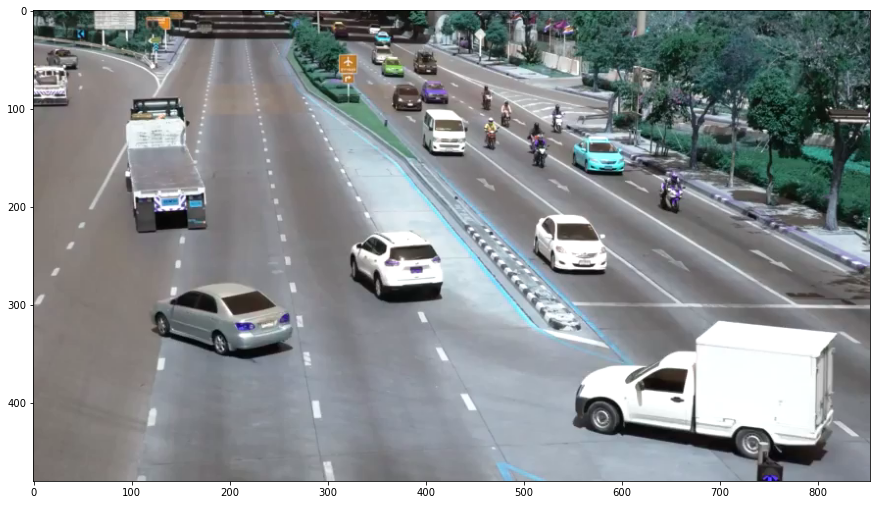

In [6]:
plt.figure(figsize = (15,15))
plt.imshow(frame)
plt.show()

In [7]:
# setup initial location of window
r,h,c,w = 94,60,384,72 # simply hardcoded the values
track_window = (c,r,w,h)

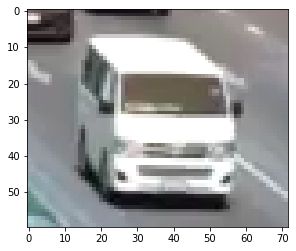

In [8]:
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
plt.imshow(roi)
plt.show()

In [9]:
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

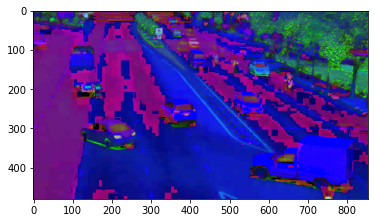

In [10]:
# set up the ROI for tracking
plt.imshow(hsv_roi)
plt.show()

In [9]:
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))

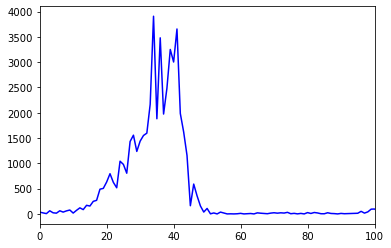

In [10]:
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
plt.plot(roi_hist, color = 'b')
plt.xlim([0,100])
plt.show()

In [11]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )


In [ ]:
while(1):
    ret ,frame = cap.read()
    
    if ret == True:
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()


# Camshift


In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [12]:
cap = cv2.VideoCapture('car.mp4')

In [13]:
# take first frame of the video
ret,frame = cap.read()

In [14]:
# setup initial location of window
r,h,c,w = 94,60,384,72 # simply hardcoded the values
track_window = (c,r,w,h)

In [15]:
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)


array([[2.2831926e+00],
       [1.3046814e+00],
       [3.9140445e-01],
       [4.0445123e+00],
       [1.4351496e+00],
       [9.7851110e-01],
       [4.0445123e+00],
       [2.3484266e+00],
       [3.9140444e+00],
       [5.0230236e+00],
       [1.1089792e+00],
       [4.6316190e+00],
       [7.8280888e+00],
       [5.5448961e+00],
       [1.1089792e+01],
       [1.0176516e+01],
       [1.6178049e+01],
       [1.7547966e+01],
       [3.1899462e+01],
       [3.2943207e+01],
       [4.1162701e+01],
       [5.1861088e+01],
       [4.0706062e+01],
       [3.3726017e+01],
       [6.7973900e+01],
       [6.3864159e+01],
       [5.2513428e+01],
       [9.3415192e+01],
       [1.0156945e+02],
       [8.0629311e+01],
       [9.3871834e+01],
       [1.0117805e+02],
       [1.0417881e+02],
       [1.4142747e+02],
       [2.5499998e+02],
       [1.2277052e+02],
       [2.2714503e+02],
       [1.2883730e+02],
       [1.6217191e+02],
       [2.1214120e+02],
       [1.9596315e+02],
       [2.385610

In [16]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

In [ ]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()